In [1]:
#Завдання №1
import numpy as np
from scipy.misc import derivative

def f(x):
    return 2*pow(x,4) - 8*pow(x,3) - 16*pow(x,2) - 1

eps = 0.0001
#Відокремлення коренів
def find_segments():
    search_range = np.arange(-10, 10, 1)
    a = None
    previous_x = None
    current_x = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x is not None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x

    return segments

segments = find_segments()

for a, b in segments:
    print(f"Відрізок: [{a}, {b}]")
#Метод половинного ділення
def rec(a, b, eps):
    while abs(a - b) > eps:
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
    x = (a + b) / 2
    return x
#Метод хорд
def hord(a, b, eps):
    if (f(a) * derivative(f, a, n=2) > 0):
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a

    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))

    while abs(xi_1 - xi) > eps:
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))

    return xi_1
#Перший відрізок
a = -2
b = -1

print(f"Розв'язок нелінійного рівняння на відрізку [{a}, {b}]")
result_rec = rec(a, b, eps)
result_hord = hord(a, b, eps)
print(f'Метод половинного ділення: x = {round(result_rec, 5)}')
print(f'Метод хорд: x = {round(result_hord, 5)}')

#Другий відрізок
a2 = 5
b2 = 6
print(f"Розв'язок нелінійного рівняння на відрізку [{a2}, {b2}]")
result_rec2 = rec(a2, b2, eps)
result_hord2 = hord(a2, b2, eps)
print(f'Метод половинного ділення: x = {round(result_rec2, 5)}')
print(f'Метод хорд: x = {round(result_hord2, 5)}')

Відрізок: [-2, -1]
Відрізок: [5, 6]
Розв'язок нелінійного рівняння на відрізку [-2, -1]
Метод половинного ділення: x = -1.49619
Метод хорд: x = -1.49614
Розв'язок нелінійного рівняння на відрізку [5, 6]
Метод половинного ділення: x = 5.46652
Метод хорд: x = 5.4665


<ipython-input-1-b20ac9584911>:41: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if (f(a) * derivative(f, a, n=2) > 0):


Значення функції у точці x_test[0] = 0.875
Значення функції у точці x_test[1] = 3.125
Значення функції у точці x_test[2] = -1.0
Значення функції у точці x_test[3] = 0.0


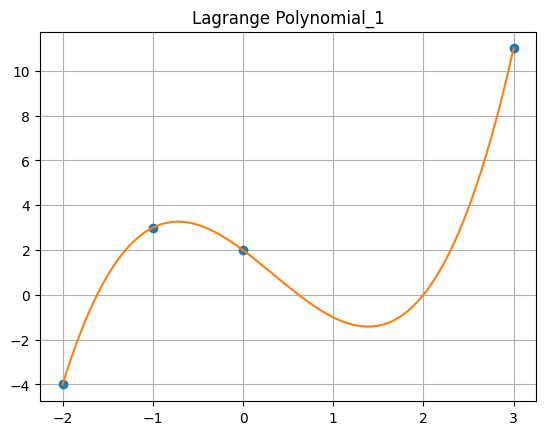

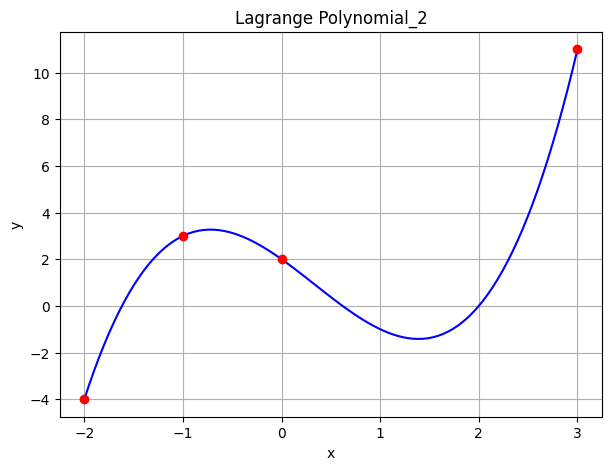

In [2]:
#Завдання №2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = np.array([-2., -1., 0., 3.], dtype=float)
y = np.array([-4., 3., 2., 11.], dtype=float)
x_test = np.array([-1.5, -0.5, 1, 2])  # точки x_test

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p_values = []

    for test_point in x_test:
        p = np.zeros(n)

        for i in range(n):
            p_i = 1

            for j in range(n):
                if i != j:
                    p_i *= (test_point - x[j]) / (x[i] - x[j])

            p[i] = p_i

        p_values.append(np.dot(y, p))

    return np.array(p_values)

# Обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f_interp = lagrange_interpolation(x, y, x_test)

#Виводимо значення
for i in range(len(x_test)):
    print(f"Значення функції у точці x_test[{i}] =", f_interp[i].round(4))


# Будуємо графік
xnew = np.linspace(np.min(x), np.max(x), 100)
ynew = lagrange_interpolation(x, y, xnew)

plt.plot(x, y, 'o', xnew, ynew)  # будуємо графік функції Лагранжа
plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

#Перевірка за допомогою scipy lagrange()
f = lagrange(x, y)

fig = plt.figure(figsize = (7,5))

plt.plot(xnew, f(xnew), 'b', x, y, 'ro')

plt.title('Lagrange Polynomial_2')

plt.grid()

plt.xlabel('x')

plt.ylabel('y')

plt.show()


Відрізок 1:
S_0(x) = 2.65 + 1.0088(x - 0.1) + 0.0000(x - 0.1)^2 + -12.7211(x - 0.1)^3, x належить [0.1, 0.3]
Відрізок 2:
S_1(x) = 2.75 + -0.5177(x - 0.3) + -7.6327(x - 0.3)^2 + 10.4535(x - 0.3)^3, x належить [0.3, 0.6]
Відрізок 3:
S_2(x) = 2.19 + -2.2748(x - 0.6) + 1.7755(x - 0.6)^2 + 2.1083(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 4:
S_3(x) = 1.76 + 0.0813(x - 1.1) + 4.9379(x - 1.1)^2 + 2.3514(x - 1.1)^3, x належить [1.1, 1.8]
Значення сплайна:
x = 0.10, y = 2.650
x = 0.12, y = 2.686
x = 0.13, y = 2.717
x = 0.15, y = 2.741
x = 0.17, y = 2.760
x = 0.19, y = 2.774
x = 0.20, y = 2.783
x = 0.22, y = 2.787
x = 0.24, y = 2.786
x = 0.25, y = 2.781
x = 0.27, y = 2.772
x = 0.29, y = 2.760
x = 0.31, y = 2.744
x = 0.32, y = 2.725
x = 0.34, y = 2.703
x = 0.36, y = 2.678
x = 0.37, y = 2.651
x = 0.39, y = 2.621
x = 0.41, y = 2.590
x = 0.43, y = 2.557
x = 0.44, y = 2.523
x = 0.46, y = 2.487
x = 0.48, y = 2.451
x = 0.49, y = 2.414
x = 0.51, y = 2.377
x = 0.53, y = 2.339
x = 0.55, y = 2.302
x = 0.56

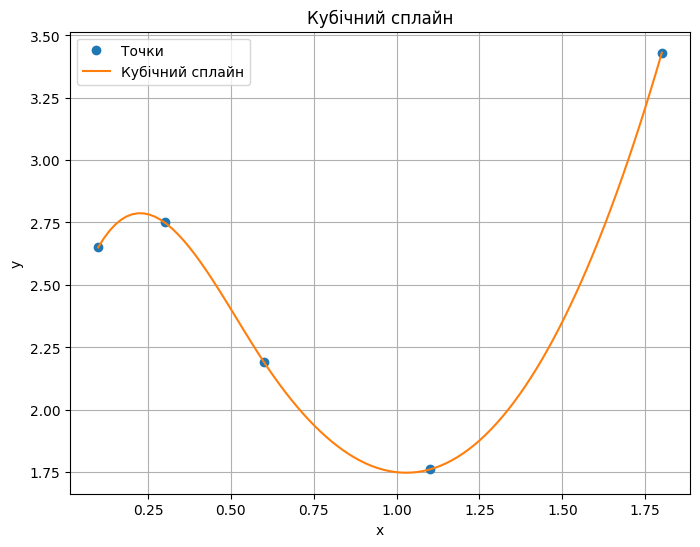

In [3]:
#Завдання 3
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

# Обчислення коефіцієнтів сплайна
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

#Значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

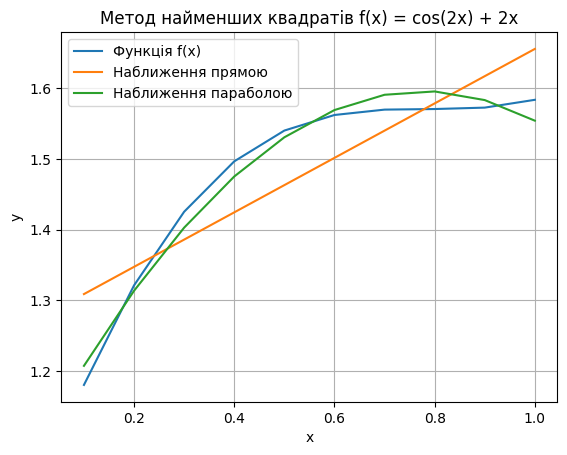

In [14]:
#Завдання 4
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Задана функція
def true_function(x):
    return np.cos(2*x) + 2*x

# Функція для наближення прямою
def linear_fit(params, x):
    a, b = params
    return a*x + b

# Функція для наближення параболою
def quadratic_fit(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

# Функція для використання least_squares
def fit_function(params, x, y, fit_func):
    return fit_func(params, x) - y

# Генерація вхідних даних
x_data = np.arange(0.1, 1.1, 0.1)
y_data = true_function(x_data)

# Початкові параметри для прямої та параболи
initial_params_linear = [1, 1]
initial_params_quadratic = [1, 1, 1]

# Наближення прямою методом найменших квадратів
result_linear = least_squares(fit_function, initial_params_linear, args=(x_data, y_data, linear_fit))

# Наближення параболою методом найменших квадратів
result_quadratic = least_squares(fit_function, initial_params_quadratic, args=(x_data, y_data, quadratic_fit))

# Генерація значень для графіків наближень
y_fit_linear = linear_fit(result_linear.x, x_data)
y_fit_quadratic = quadratic_fit(result_quadratic.x, x_data)

# Побудова графіків з сіткою
plt.plot(x_data, y_data, label='Функція f(x)')
plt.plot(x_data, y_fit_linear, label='Наближення прямою')
plt.plot(x_data, y_fit_quadratic, label='Наближення параболою')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод найменших квадратів f(x) = cos(2x) + 2x')
plt.grid(True)
plt.show()



In [15]:
#Завдання 5
#1)Метод прямокутників
from scipy import integrate
import numpy as np

eps = 0.001
a = 0.8
b = 1.4

def f1(x):
    return x / np.sqrt(2*x + 3)

def left_rec(f1, a, b, n):
    h = (b - a) / n
    sum = 0
    for i in range(0, n):
        sum += f1(a + i * h)
    return sum * h

v, err = integrate.quad(f1, a, b)  # Перевірка

# Перевірка точності за правилом Рунге:
if abs(left_rec(f1, a, b, 2 * 10) - left_rec(f1, a, b, 10)) / 3. <= eps:
  print("left rectangle:", round(left_rec(f1, a, b, 10), 5))


def right_rec(f1, a, b, n):
    h = (b - a) / n
    sum = 0
    for i in range(1, n + 1):
        sum += f1(a + i * h)
    return sum * h

print("right rectangle:", round(right_rec(f1, a, b, 10), 5))

def aver_rec(f1, a, b, n):
    h = 0.08
    sum = 0
    for i in range(0, n):
        sum += f1(a + i * h)
    return sum * h

print("left rectangle:", round(left_rec(f1, a, b, 10), 5))
print("average rectangle:", round(aver_rec(f1, a, b, 10), 5))
print("Check for the rectangle method= ", round(v, 5))

right rectangle: 0.29462
left rectangle: 0.28212
average rectangle: 0.4
Check for the rectangle method=  0.28839


In [16]:
#2)Метод Сімпсона
from scipy import integrate
import numpy as np

# Задаємо функцію, яку необхідно інтегрувати
def f(x):
    return np.sqrt(x) * np.cos(x**2)

# Задаємо межі інтегрування та початкову кількість розбиттів
a = 0.4
b = 1.2
n = 8

# Обчислюємо значення інтегралу методом Симпсона
def simpson_rule(f, a, b, n):
    h = (b - a) / n
    integr = f(a) + f(b)
    for i in range(1, n):
        k = a + i * h
        if i % 2 == 0:
            integr += 2 * f(k)
        else:
            integr += 4 * f(k)
    integr *= h / 3
    return integr

# Обчислюємо значення інтегралу методом Сімпсона з точністю 0.001
integral1 = simpson_rule(f, a, b, n)
n *= 2
integral2 = simpson_rule(f, a, b, n)
while abs(integral2 - integral1) / 15 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = simpson_rule(f, a, b, n)

# Виводимо результат
print("Simpson method:", round(integral2, 3))
v, err = integrate.quad(f, a, b)
# Перевірка
print("Check for the Simpson method= ", round(v, 3))

Simpson method: 0.484
Check for the Simpson method=  0.484


In [17]:
#3)Метод трапецій
from scipy import integrate
import numpy as np

# Задаємо функцію, яку необхідно інтегрувати
def f(x):
    return  x / np.sqrt(3*x**2 - 0.4)

# Задаємо межі інтегрування та початкову кількість розбиттів
a = 1.3
b = 2.1
n = 20

# Обчислюємо значення інтегралу методом трапецій
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = a
    sum = 0
    for i in range(1, n):
        x += h
        sum += 2 * f(x)
    sum += f(b)
    integral = h / 2 * sum
    return integral

# Обчислюємо значення інтегралу методом трапецій з точністю 0.001
# Перевірка точності за правилом Рунге
integral1 = trapezoidal_rule(f, a, b, n)
n *= 2
integral2 = trapezoidal_rule(f, a, b, n)
while abs(integral2 - integral1) / 3 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = trapezoidal_rule(f, a, b, n)

# Виводимо результат
print("Trapezoidal method:", round(integral2, 3))
# Перевірка
v, err = integrate.quad(f, a, b)
print("Check for the trapezoidal method =", round(v, 5))

Trapezoidal method: 0.472
Check for the trapezoidal method = 0.47363
